Machine learning has 3 important areas: supervised learning, unsupervised learning and reinforcement learning.<br>

<b>Supervised learning</b> says: I give you some examples. Each example comes with an attached label. Find an algorithm that predicts the label of an unseen example, using the known examples and labels. <br>

 - Discrete case (<b>Classification</b>): Here are some pictures of cats, here are some pictures of dogs. Here's a new picture, is it a cat or a dog? <br>
 - Continuous case (<b>Regression</b>): Here's a spreadsheet with 2 columns, the number of cat pics that a person has shared on their wall and the person's wage. Tell me how much does this new person make just by looking at how many cat pics they have shared.

<b>Unsupervised learning</b> says: I give you the raw, unlabeled data. What can you do with it?
 - Find structure in data (<b>Clustering</b>): I give you some shuffled pictures of cats and dogs. You have never seen a cat or a dog in your life. Arrange the photos in 2 piles so that the pictures in each pile are similar to one another, but they look nothing like the pictures from the other pile. Notice this is a more difficult task. 
 
 - Dimensionality reduction (<b>Visualization</b>): I give you pictures of cats of all breeds and colors. Draw me the blurriest picture you can, but one that I can still make a cat out of.
 
<b>Reinforcement learning</b> says: Learn the best action you can take in a constrained environment, based on rewards. Reinforcement learning is when you become better at Tetris by realizing how to fit the pieces in order to complete as many rows. No more cats examples, sorry.

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


##1. Polynomial regression
Let's start with a simple example that will help us motivate some key concepts in machine learning. Suppose we have a blackbox that gives us some noisy 2D measurements of an unknown process P. The objective is to fit a curve that is as faithful as possible to process P.

Go through each cell, complete the TODOs and answer the questions

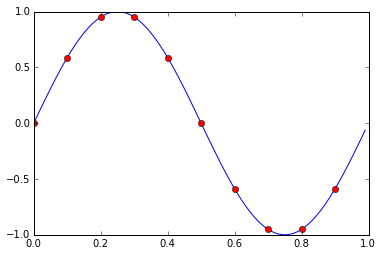

In [6]:
#Let's assume that the magic process P is the sine function. We generate 10 measurements and plot them alongside
#the sine

N = 10 #number of samples
M = 4  #degree of polynomial
xground = np.arange(0, 1, 0.01)
yground = np.sin(2 * math.pi * xground)

# Get some points at regular interval, this will be our training set
x_train = np.arange(0, 1, 1./N)
t_train = np.sin(2 * math.pi * x_train)
        
plt.plot(xground, yground)
plt.plot(x_train, t_train, 'ro')

In [15]:
#Let's add some noise to our sampled points. 
std_deviation = 0.3
t_train = t_train + std_deviation * np.random.randn(N)

#Let's also generate some other noisy points that we'll come back to later
test_size = 8
x_test = np.random.random_sample(test_size)
t_test = np.sin(2 * math.pi * x_test) + np.random.randn(test_size) * std_deviation

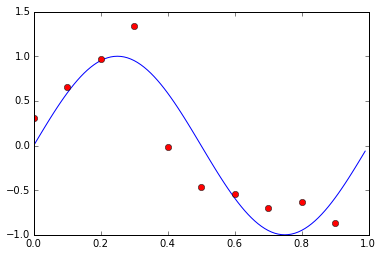

In [16]:
#Let's plot our noisy points alongside the ground truth
plt.plot(xground, yground)
plt.plot(x_train, t_train, 'ro')

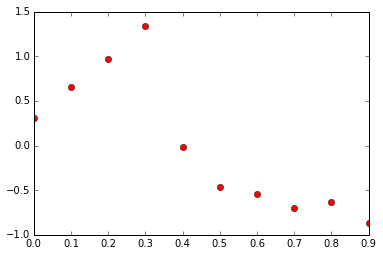

In [17]:
#We plot the sampled points only and 'forget' about the underlying process. This is our training set. How can we
#fit a curve through the points? One solution is to fit a polynomial that is flexible enough.
plt.plot(x_train, t_train, 'ro')

In [18]:
#TODO: Fit a 4-degree polynomial to the training points (hint: built-in numpy function, np package). The method should
#return an array of 5 weights. 
coef = np.polyfit(x_train, t_train, 4)
print(coef)

[-31.36395149  74.05235223 -56.96228032  13.06674124   0.17241095]


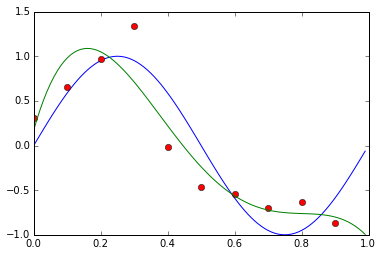

In [19]:
#Plot the ground truth points
plt.plot(xground, yground)

#Plot the training points with red
plt.plot(x_train, t_train, 'ro')

#TODO: Evaluate the 4-degree polynomial at all xground points using the previously obtained w weights.
#(hint: built-in numpy function). Plot the evaluated points using a green line.
predicted_xground = np.polyval(coef, xground)
plt.plot(xground, predicted_xground, 'green')

In [20]:
#In supervised learning, we build a model m that uses the training examples x and their labels t to learn
#a mapping between each x and t. But how does the model know it's doing a good job learning? 
#For each input x, m predicts an output y. The model needs a criterion/measure so that what its prediction y
#isn't far away from the truth t.

#This criterion is known in machine learning as an error function/loss function/cost function. During training, 
#the objective is to 'tweak' the model m in order to minimize this error function.

#One popular choice is the squared error function, which
#sums the squared differences between all the predictions y and the truth values t. This is actually how
#the weights of the fitted polynomial were obtained. The training error in the previous figure is the 
#sum of the squared vertical distances from the red points to the green line. 

<img src="squerror.png">
E(x, w) = sum of squared lengths of green lines

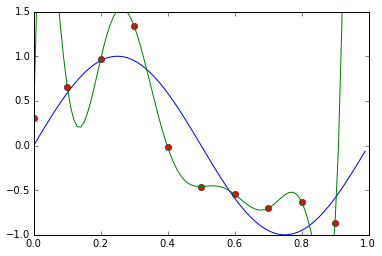

In [22]:
#The model m that we've considered so far is a 4-degree polynomial. Besides the problem of optimizing
#a selected model, there is also the problem of selecting an appropriate model from a set of predefined models.
#This problem is known as model selection

#Let's consider two other models: a smaller-degree polynomial and a higher one.
#TODO, fit the ${deg}-degree polynomial on the training set and plot it alongside 
#the true sine function and the training set
degrees = [2, 9]
for deg in degrees:
    plt.plot(xground, yground)
    plt.plot(x_train, t_train, 'ro')
    coef = np.polyfit(x_train, t_train, deg)
    predicted_xground = np.polyval(coef, xground)
    plt.plot(xground, predicted_xground, 'green', scaley = False)
    plt.show()

In [10]:
#What do you notice? The first-degree polynomial is basically a line that fails to capture the 
#oscillating behaviour of sinus. What about the 9-th degree polynomial? It passes through all the
#training points.

#Remember in cell 6 we generated 8 points that we kept separate from the points that we fitted our polynomial on.
#These points represent the TEST SET. The test set is used in machine learning to evaluate how well a model 
#generalizes. 

#We plot the 9-degree polynomial again, but this time together with the test points
plt.plot(xground, yground)
plt.plot(x_train, t_train, 'ro')
plt.plot(x_test, t_test, 'co')
plt.plot(xground, eval_xground, 'green', scaley = False)

In [30]:
from __future__ import division

#Although the 9-th degree perfectly predicted the training points, it did so by wildly oscillating between
#some of the them. This behaviour leads to large errors on the test set. But let's stop comparing errors
#visually and actually start measuring them.

#TODO: implement the squared error function: E_sq(w,x,t) = 1/2 * sum((y(w, xi) - ti) ^ 2)
#w: weights of the fitted polynomial
#x: training/test points
#t: true value of points
def squerror(w, x, t):
    return (1 / 2.0) * np.dot(np.polyval(w, x) - t, np.polyval(w, x) - t)
    
#TODO: implement the root mean squared error using the squared error implemented above:
#E_rms = square_root(2 * E_sq / N)
#The squared root ensures that the error has the same order of magnitude as the label values
#The division by N (number of points) ensures that the error can be compared between
#different-sized datasets. (the training set is is usually bigger than the test set for example)
def rootmean_squerror(w, x, t):
    return np.sqrt((2 * squerror(w, x, t) / len(x)))

In [31]:
#In machine learning, we want our model to generalize well to new examples. Intuitively, the more powerful a model
#is (more parameters), the better it can capture irregularities in the examples it has seen. 
#But power comes with a price. If the model becomes too complex, it will no longer learn how to
#behave well on unseen examples, but will just learn the 'noise' in the known examples. We say that the model
#has high variance. This phenomena is called overfitting. 

#The opposite of overfitting is underfitting and happens when our model oversimplifies the assumptions it makes 
#about the data. We say the model is biased.

#Ideally, we would like to strike a balance between overfitting and underfitting.

#TODO: read more about bias-variance
# http://scott.fortmann-roe.com/docs/BiasVariance.html

In [32]:
#In order to choose the model m that better generalizes the data, let' plot the rms error for the training/test 
#set for polynomials of degrees [1-9]
training_errors = []
test_errors = []
for deg in range(1, 10):
    w = np.polyfit(x_train, t_train, deg)
    training_errors.append(squerror(w, x_train, t_train))
    test_errors.append(squerror(w, x_test, t_test))
plt.plot(range(1, 10), training_errors, 'bo-', scaley = False)
plt.plot(range(1, 10), test_errors, 'ro-', scaley = False)

In [14]:
#The training error in blue reaches 0 when the polynomial has a sufficiently large degree. However, the test
#error off-shoots. A 3-degree polynomial has low training error and also low test error

In [35]:
#Let's plot the weights for the 9 models:
for deg in range(1, 10):
    w = np.polyfit(x_train, t_train, deg) #TODO fit polynomial of degree deg on x_train points
    print("Degree " + str(deg) + ': ' + str(list(w)) + '\n')

Degree 1: [-2.066671792987913, 0.93476356488088108]

Degree 2: [-1.5284159234409509, -0.69109746189105747, 0.75135365406796673]

Degree 3: [17.59723955053185, -25.284689316658955, 7.4212299709041343, 0.30790321739456489]

Degree 4: [-31.363951487517415, 74.052352228063185, -56.962280319051573, 13.066741238657276, 0.1724109469684891]

Degree 5: [-180.18401137189448, 374.05007409924679, -244.27273452895406, 44.391226077641377, 2.1235656146703339, 0.28052135379165655]

Degree 6: [637.56159913245006, -1901.6003290295059, 2115.7524426383411, -1055.4249690615525, 214.00579550502232, -10.249766220129079, 0.3222526584621605]

Degree 7: [600.88971622308861, -1255.2410069702676, 445.79845853888702, 667.03044796744655, -594.30325133847145, 144.02239733029654, -6.4326710251729571, 0.31907592681551183]

Degree 8: [-30159.440945694831, 109174.87712073003, -160859.00249160099, 123568.70017525615, -52558.582928699572, 12103.84216787777, -1371.1529898831886, 61.187512033769714, 0.3105722298993136]

Deg

In [16]:
#We notice that the higher the polynomial degree, the larger the coefficients. When M = 9, the
#large coefficients are so tuned that they learn the noise in the input.

In [26]:
#Let's see what happens to a complex model when we increase the size of the training data
N2 = 100
x_train_extra = np.arange(0, 1, 1./N2)
t_train_extra = np.sin(2 * math.pi * x_train_extra) + std_deviation * np.random.rand(N2)

#TODO: fit a 9-degree polynomial on the training data and evaluate it at xground points.
coef = np.polyfit(x_train_extra, t_train_extra, 9) #fit polynomial
eval_xground = np.polyval(coef, x_train_extra) #evaluate polynomial

#Plot the true function, the training data and the fitted curve
plt.plot(xground, yground)
plt.plot(x_train_extra, t_train_extra, 'ro')
plt.plot(xground, eval_xground, 'green')

#Remember the 9-degree polynomial fitted on 10 points? It wildly oscillated between some points. The model
#was too complex for the size of the dataset and it overfitted.
#What happens when the training set increases? The 9-degree polynomial starts to resemble the true function,
#the one that generated our dataset. In other words, the complexity of the model depends on the size of the
#dataset. The bigger the set, the more we can afford a complex model. One rough estimate for the upper limit of
#the number of parameters your model can afford is: parameter_count < dataset_size / 5 

In [29]:
#One of the problems when we fitted a large-degree polynomial on the initial 10 points was that the larger the
#degree, the bigger the coefficients of the polynomial.
#Our only criterion for fitting a polynomial was to penalize differences between our predictions and the true
#values. An additional criterion would be to restrict the value of the weights. This method is called
#regularization and it prevents overfitting.

#TODO: implement the squared error with L2-norm regularization
#reg_param: regularization parameter, that controls how much we penalize the weights
def reg_squerror(w, x, t, reg_param):
    return squerror(w, x, t) + reg_param * np.dot(w, w)
    
#TODO: How do different values for the regularization parameter affect the weights/overfitting?
#Read: Bishop - Pattern Recognition, Chapter 1, Polynomial curve fitting

## 2. Questions
    - How can you prevent overfitting a model?

In [ ]:
Try to get a large training set and adjust your model capacity to its size.

In [ ]:
Split your training set into a smaller training set (about 80% of entries) and a validation set and 
use the validation set to keep track of overfitting.

In [ ]:
If the training set is small, you can use cross-validation, with the caveat of using more computational resources.